# pull in the data

In [1]:
import pandas as pd

In [2]:
#load in the data from an excel file and save in a pandas dataset
#preview the data
bean_df= pd.read_excel('my_data/Dry_Bean_Dataset.xlsx')
bean_df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [3]:
#check for data types and see if information is missing
bean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

We can see that no instances are missing or NAN values, and that all variables 
are continuous except for the target variable 

In [4]:
#column information and dataset taken from
#https://archive.ics.uci.edu/dataset/602/dry+bean+dataset
#column information
"""
1.) Area (A): The area of a bean zone and the number of pixels within its boundaries.
2.) Perimeter (P): Bean circumference is defined as the length of its border.
3.) Major axis length (L): The distance between the ends of the longest line that can be drawn from a bean.
4.) Minor axis length (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.
5.) Aspect ratio (K): Defines the relationship between L and l.
6.) Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.
7.) Convex area (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
8.) Equivalent diameter (Ed): The diameter of a circle having the same area as a bean seed area.
9.) Extent (Ex): The ratio of the pixels in the bounding box to the bean area.
10.)Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
11.)Roundness (R): Calculated with the following formula: (4piA)/(P^2)
12.)Compactness (CO): Measures the roundness of an object: Ed/L
13.)ShapeFactor1 (SF1)
14.)ShapeFactor2 (SF2)
15.)ShapeFactor3 (SF3)
16.)ShapeFactor4 (SF4)
17.)Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)
"""

'\n1.) Area (A): The area of a bean zone and the number of pixels within its boundaries.\n2.) Perimeter (P): Bean circumference is defined as the length of its border.\n3.) Major axis length (L): The distance between the ends of the longest line that can be drawn from a bean.\n4.) Minor axis length (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.\n5.) Aspect ratio (K): Defines the relationship between L and l.\n6.) Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.\n7.) Convex area (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.\n8.) Equivalent diameter (Ed): The diameter of a circle having the same area as a bean seed area.\n9.) Extent (Ex): The ratio of the pixels in the bounding box to the bean area.\n10.)Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.\n11.)Roundness (R): Calculated with the 

In [5]:
#check out the target class
bean_df['Class'].value_counts(normalize=True)

Class
DERMASON    0.260525
SIRA        0.193667
SEKER       0.148924
HOROZ       0.141650
CALI        0.119756
BARBUNYA    0.097127
BOMBAY      0.038351
Name: proportion, dtype: float64

Here we can see that the 'DERMASON' bean is the most commonly represented out of the 7 bean types.
This specific bean will become our target class, and we will try to predict if a bean is or isn't
a Dermason bean based off of other present dependent vartiables. 
so we will be running

# feature engineering


Currently the target variable column shows which of the 7 beans each row is. We want to create a new target varable column showing if an instance is or is not a Dermason bean.

In [6]:
#lambda function creating column showing if instance is or isn't the target bean
bean_df['Dermason?']= bean_df['Class'].apply(lambda x: 1 if x == 'DERMASON' else 0) 
bean_df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class,Dermason?
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER,0
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER,0
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER,0
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER,0
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER,0


In [7]:
#check to make sure this new Dermason column proportion matches the above proportion
bean_df['Dermason?'].value_counts(normalize=True)

Dermason?
0    0.739475
1    0.260525
Name: proportion, dtype: float64

The proportion matches but is only a quarter of the dataset. This may lead to underrepresentation problems in the classification down the line. Potential solutions are using SMOTE to artifically increase there Dermason (denoted by '1') frequency, and random undersampling of the '0' instances to bring the ratio closer to 50-50.

# Splitting the data up into train and test subsets

In [8]:
#import some relative libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, auc
from numbers import Number
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

In [9]:
#assign the independent variable columns
X= bean_df.drop(['Dermason?','Class'], axis = 1)
#assign the dependant variable columns
y= bean_df['Dermason?']

#split up the data into train and test subsets
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state= 24, test_size= 0.1)

# inspect the training data

In [10]:
#Check for high levels or correlation among the X_train data.
#Anything above 0.8 could be problematic for model classification
X_train.corr()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
Area,1.000000,0.966993,0.932142,0.952206,0.240248,0.266727,0.999940,0.985046,0.056011,-0.193281,-0.355742,-0.266932,-0.848516,-0.638820,-0.271117,-0.356649
Perimeter,0.966993,1.000000,0.977515,0.914137,0.383606,0.390148,0.967946,0.991527,-0.019421,-0.299955,-0.545221,-0.405570,-0.865438,-0.767014,-0.407261,-0.430223
MajorAxisLength,0.932142,0.977515,1.000000,0.827543,0.548434,0.540704,0.932905,0.962013,-0.076725,-0.280830,-0.594614,-0.566825,-0.774986,-0.858583,-0.566731,-0.483104
MinorAxisLength,0.952206,0.914137,0.827543,1.000000,-0.008816,0.020667,0.951957,0.949056,0.147341,-0.153526,-0.209613,-0.015784,-0.947031,-0.472263,-0.020151,-0.266080
AspectRation,0.240248,0.383606,0.548434,-0.008816,1.000000,0.923920,0.241791,0.302427,-0.371077,-0.265588,-0.767329,-0.987634,0.024154,-0.837387,-0.978507,-0.447964
Eccentricity,0.266727,0.390148,0.540704,0.020667,0.923920,1.000000,0.268482,0.318165,-0.320043,-0.296318,-0.722651,-0.970137,0.018822,-0.860030,-0.980923,-0.448444
ConvexArea,0.999940,0.967946,0.932905,0.951957,0.241791,0.268482,1.000000,0.985306,0.054282,-0.202829,-0.360244,-0.268765,-0.848524,-0.640382,-0.272975,-0.362946
EquivDiameter,0.985046,0.991527,0.962013,0.949056,0.302427,0.318165,0.985306,1.000000,0.029835,-0.228500,-0.434310,-0.326798,-0.893128,-0.712711,-0.329643,-0.393800
Extent,0.056011,-0.019421,-0.076725,0.147341,-0.371077,-0.320043,0.054282,0.029835,1.000000,0.186955,0.345184,0.355027,-0.142172,0.238002,0.348436,0.144614
Solidity,-0.193281,-0.299955,-0.280830,-0.153526,-0.265588,-0.296318,-0.202829,-0.228500,0.186955,1.000000,0.604263,0.302002,0.151795,0.341279,0.306037,0.702385


here we can see that there is a lot of high correlation betweeen the dimensionaql variables. this can potentially ve a problem for predictive models given the following

In [11]:
#logistic regression
"""
Unstable coefficient estimates: When variables are highly correlated, 
the model can have trouble determining the individual contribution of each feature. 
This can make the model's coefficients unstable, and they might change drastically 
with small changes in the data.

Overfitting: If you have many correlated variables, logistic regression might start 
to overfit, where it memorizes the noise in the data rather than learning the 
underlying patterns.

"""

#possible fixs are:
"""
Use variance inflation factor (VIF): A high VIF indicates high multicollinearity. 
If VIF is high for some variables, you might want to remove or combine them.

Principal Component Analysis (PCA): PCA can reduce the dimensionality of your feature
set while retaining as much variance as possible, which could be helpful if you're 
working with correlated features.

"""

"\nUse variance inflation factor (VIF): A high VIF indicates high multicollinearity. \nIf VIF is high for some variables, you might want to remove or combine them.\n\nPrincipal Component Analysis (PCA): PCA can reduce the dimensionality of your feature\nset while retaining as much variance as possible, which could be helpful if you're \nworking with correlated features.\n\n"

In [12]:
#Decision trees

"""
not so sensitive to high correlation and handles it pretty well.

if there is still too much multi-colinearity then pruning a tree or setting a depth 
limit can still help. So can Random Forests or Gradient Boosting. 

"""

'\nnot so sensitive to high correlation and handles it pretty well.\n\nif there is still too much multi-colinearity then pruning a tree or setting a depth \nlimit can still help. So can Random Forests or Gradient Boosting. \n\n'

Here we will check out the data distrobution to see what is normal and what is skewed.

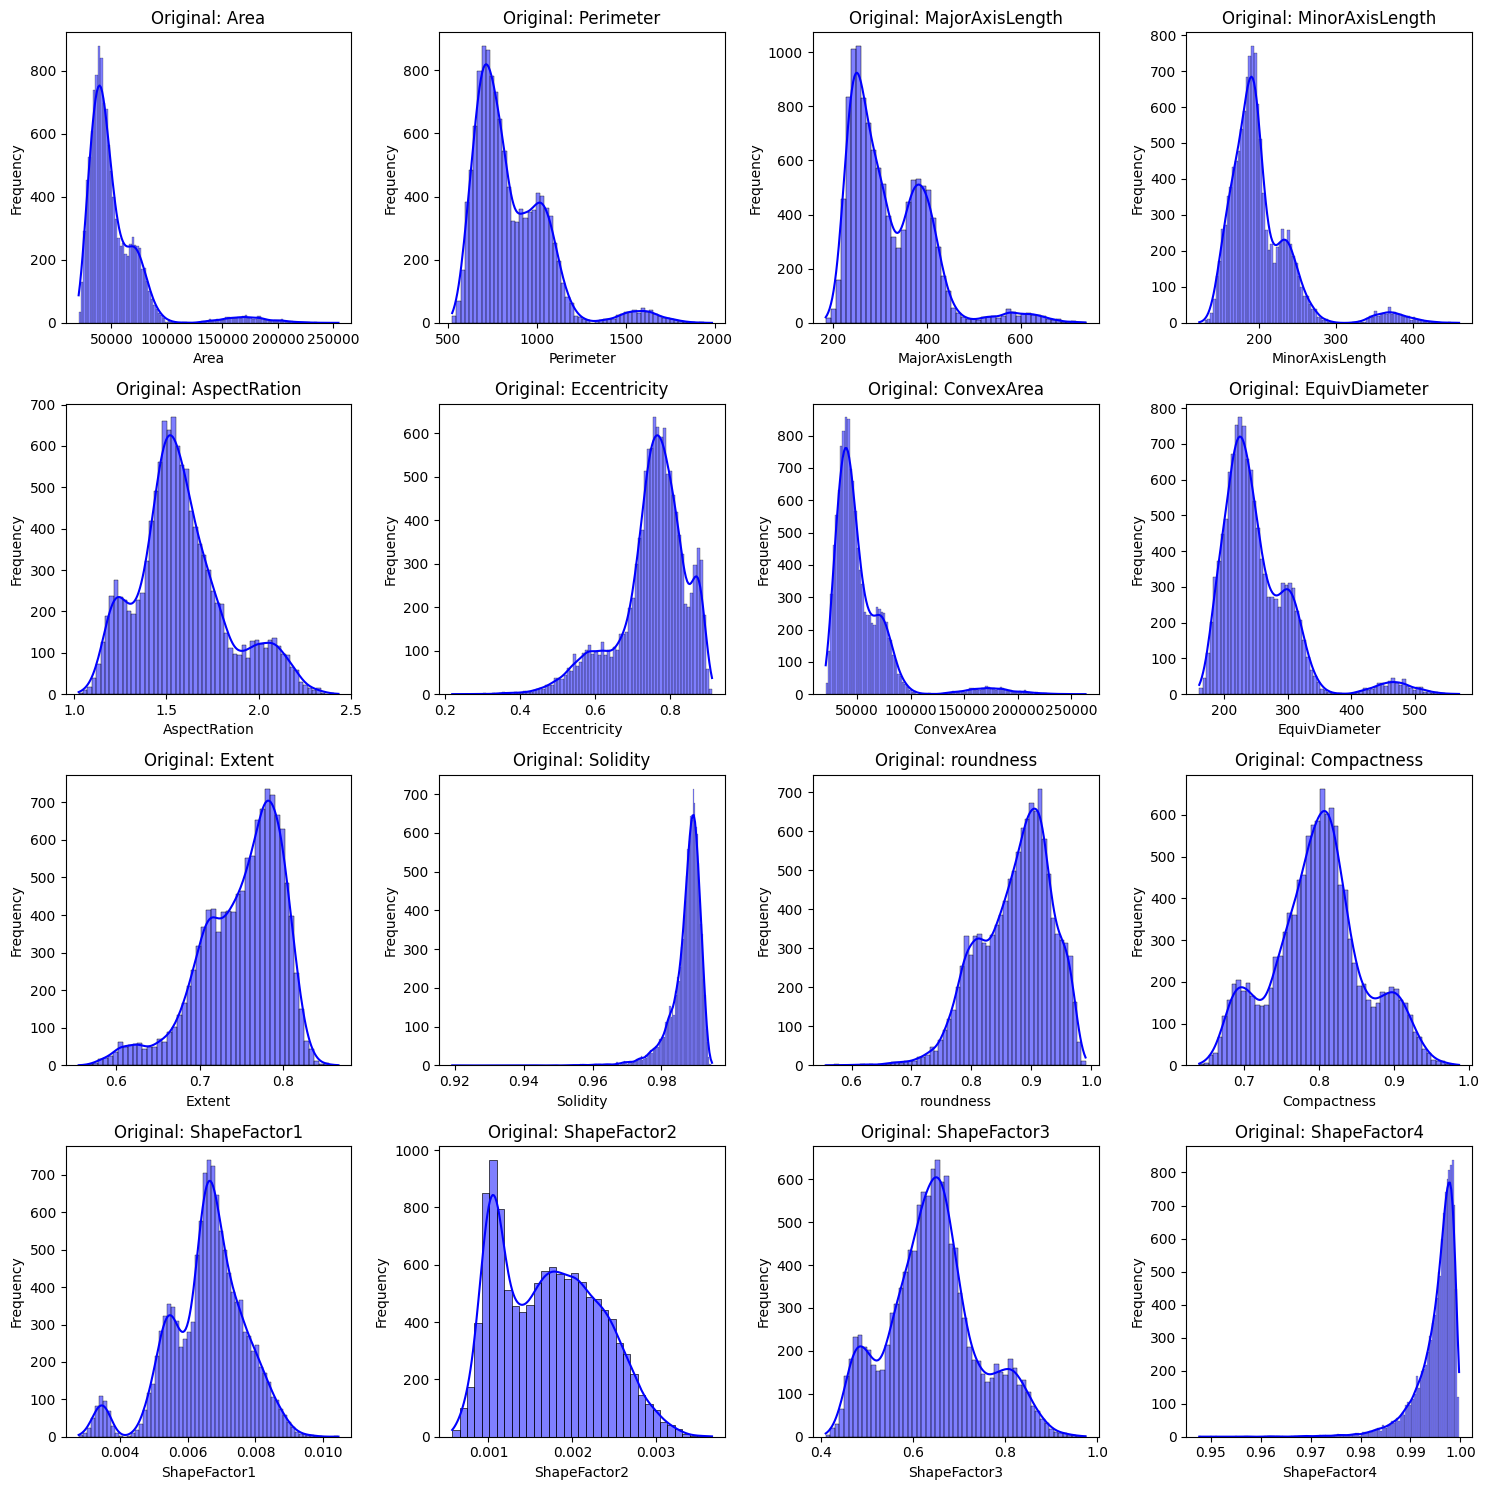

In [13]:
#download relevant graphing library
import matplotlib.pyplot as plt

#Create a figure to hold all subplots
fig, axes = plt.subplots(4, 4, figsize=(15, 15))

#Flatten the axes array to easily iterate over
axes = axes.flatten()

#Plot the original data
for i, col in enumerate(X_train.columns):
    sns.histplot(X_train[col], kde=True, color='blue', ax=axes[i])
    axes[i].set_title(f'Original: {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

A fair amount of this data does not have a normal distrobution and is either left or right skewed, which can be problematic with machine learning. 

In [14]:
#if the data is right skewed use a log transformation.
#if it is slightly right skewed use a square root transformation
#if that fails use an exponential transformation

#if the data is left skewed you can use reciprocal transformation 
#can also use square or cube root transformation



make a function to redistribute skewed data

In [15]:
from scipy import stats

#list of columns to transform and the redistribution methods

#columns to log transform
LogT=['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'ConvexArea',
      'EquivDiameter', 'ShapeFactor2']

#columns to Box-Cox transform
BoxCoxT= ['Eccentricity', 'Solidity', 'roundness', 'ShapeFactor4']

#create a function to transform the columns in a data frame accordingly, or not
def TransShift(df):
    
    Redist= pd.DataFrame()
    
    for col in df.columns:
        if col in LogT:
            Redist[col]= np.log(df[col])
        elif col in BoxCoxT:
            Redist[col], _ = stats.boxcox(df[col] + 1)
        else:
            Redist[col]= df[col]
    
    return Redist


/opt/anaconda3/envs/my_py_3_8_5_env/lib/python3.8/site-packages/numpy/core/_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


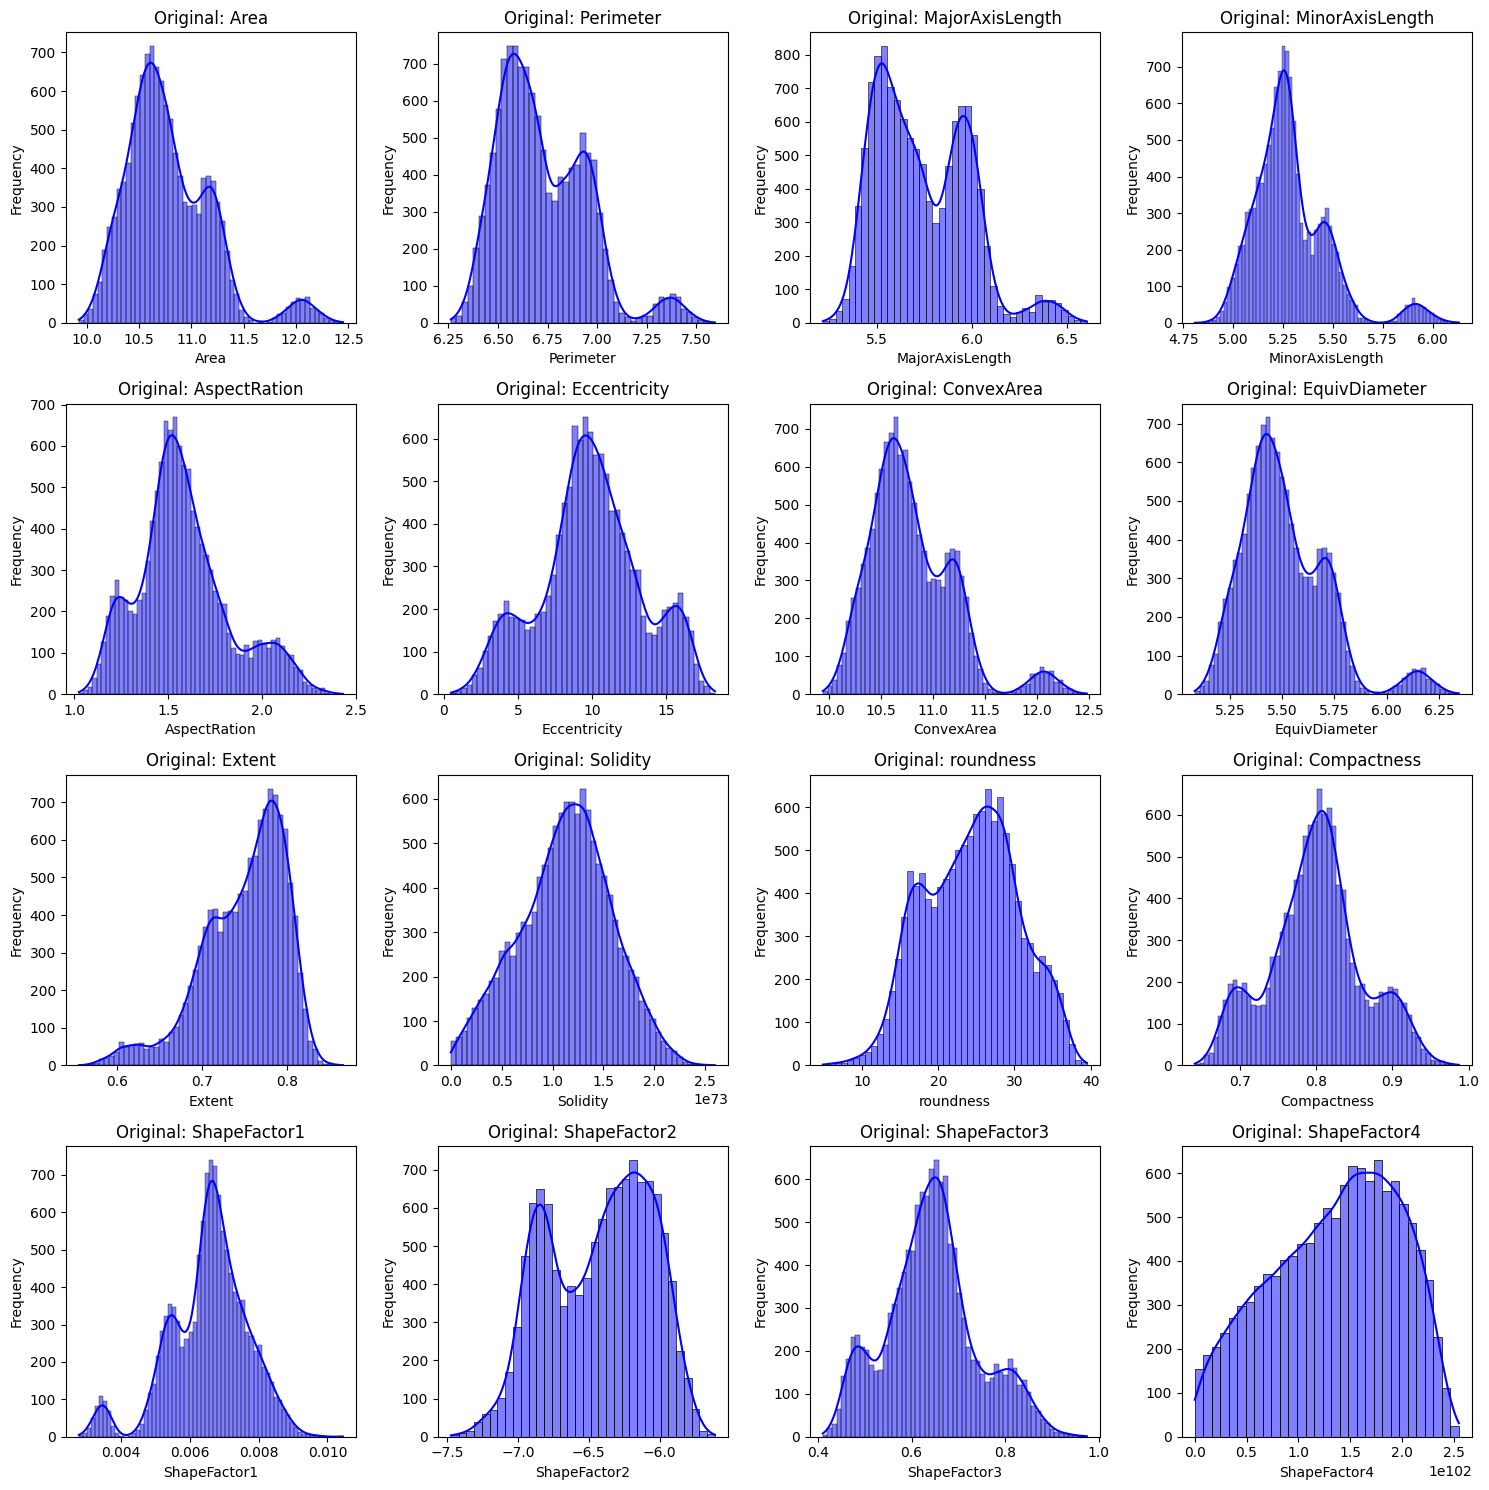

In [16]:
#plot the new normalized data distribution to check it out
X_train_TransShift= TransShift(X_train)

#Create a figure to hold all subplots
fig, axes = plt.subplots(4, 4, figsize=(15, 15))

#Flatten the axes array to easily iterate over
axes = axes.flatten()

#Plot the original data
for i, col in enumerate(X_train_TransShift.columns):
    sns.histplot(X_train_TransShift[col], kde=True, color='blue', ax=axes[i])
    axes[i].set_title(f'Original: {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [17]:
#make a function to standardize all the data
def Scale_It(df):
    #initialize the scaler
    scaler = StandardScaler()
    #fit the scaler and transform the data
    scaled_data = scaler.fit_transform(df)
    #turn the scaled data back into a dataframe
    df_scaled = pd.DataFrame(scaled_data, columns=df.columns)

    return df_scaled

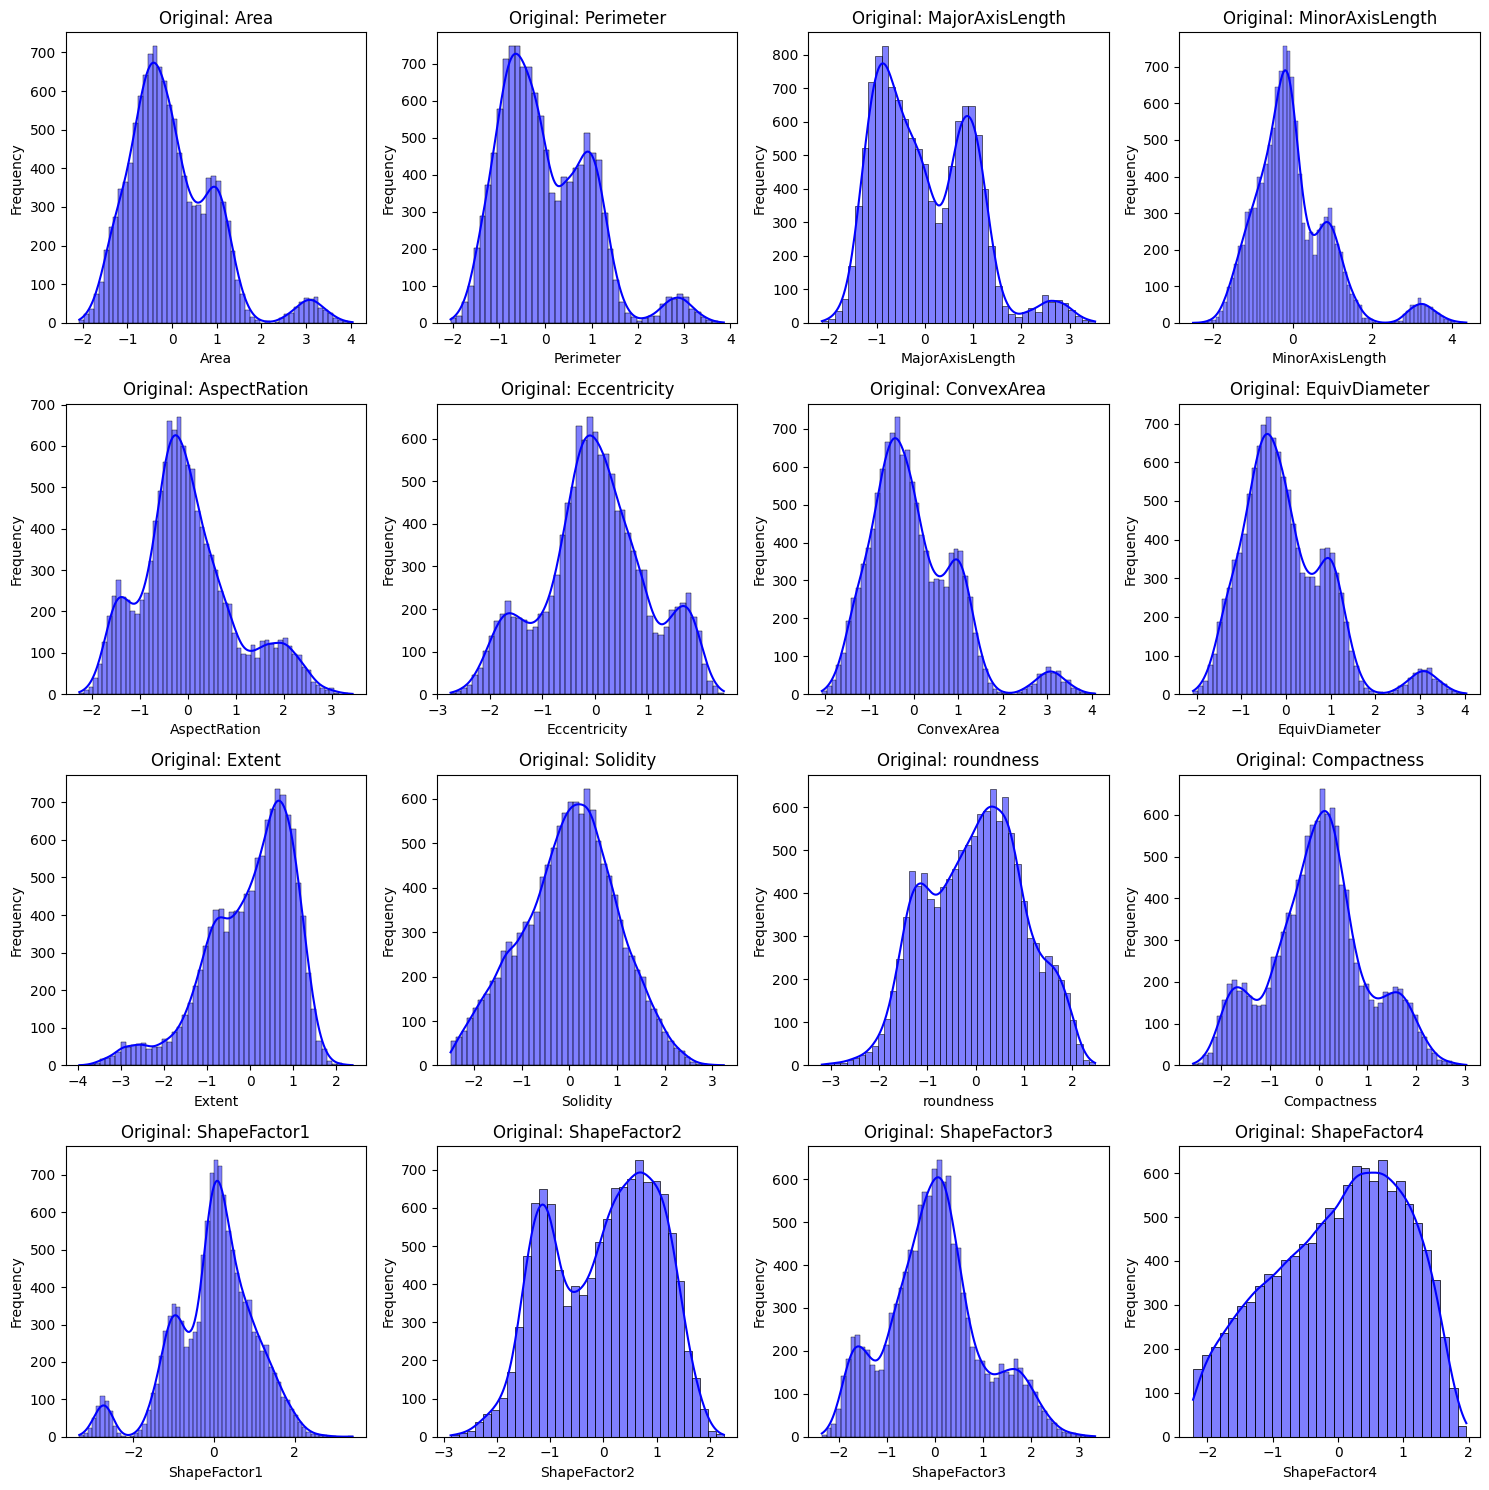

In [18]:
#plot the new standardized data to check it out
X_train_Scaled_TransShift= Scale_It(X_train_TransShift)

#Create a figure to hold all subplots
fig, axes = plt.subplots(4, 4, figsize=(15, 15))

#Flatten the axes array to easily iterate over
axes = axes.flatten()

#Plot the original data
for i, col in enumerate(X_train_Scaled_TransShift.columns):
    sns.histplot(X_train_Scaled_TransShift[col], kde=True, color='blue', ax=axes[i])
    axes[i].set_title(f'Original: {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()